In [54]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os
import glob
import mediapipe as mp
import json

# Load JSON File with labels

In [61]:
labels = []
json_path = "../resources/images/labeled_images/Label_Tensorflow_And_Hand_Labeling/Studienarbeit_Labeling_HPE_v1.json"

# Initialize a list to hold the keypoint dictionaries for each image
keypoints_labels = []

# Open and load the JSON file
with open(json_path) as f:
    data = json.load(f)

    # Loop through each image in the JSON data
    for image_id, image_info in data["_via_img_metadata"].items():
        # Initialize a dictionary to store keypoints for the current image
        keypoints_dict = {
            "filename": image_info["filename"],
            "keypoints": []
        }

        # Extract regions (keypoints) for the current image
        for region in image_info["regions"]:
            # Get the shape attributes (cx and cy coordinates)
            x = region["shape_attributes"]["cx"]
            y = region["shape_attributes"]["cy"]
            keypoint_label = region["region_attributes"]["Keypoints"]

            if keypoint_label == "LEFT_ELLBOW":
                keypoint_label = "LEFT_ELBOW"
            elif keypoint_label == "RIGHT_ELLBOW":
                keypoint_label = "RIGHT_ELBOW"

            # Append the keypoint to the keypoints list in the dictionary
            keypoints_dict["keypoints"].append({
                "label": keypoint_label,
                "x": x,
                "y": y
            })

        # Append the dictionary to the keypoints data list
        keypoints_labels.append(keypoints_dict)

# Print the extracted keypoints data for verification
for item in keypoints_labels:
    print(item)

{'filename': 'squat-functionalshirt-positive_540x1080_frame_0.jpg', 'keypoints': [{'label': 'RIGHT_ANKLE', 'x': 250, 'y': 868}, {'label': 'RIGHT_KNEE', 'x': 262, 'y': 660}, {'label': 'RIGHT_HIP', 'x': 262, 'y': 479}, {'label': 'RIGHT_SHOULDER', 'x': 274, 'y': 314}, {'label': 'RIGHT_ELBOW', 'x': 280, 'y': 413}, {'label': 'RIGHT_WRIST', 'x': 333, 'y': 510}]}
{'filename': 'squat-functionalshirt-positive_540x1080_frame_40.jpg', 'keypoints': [{'label': 'RIGHT_ANKLE', 'x': 265, 'y': 855}, {'label': 'RIGHT_KNEE', 'x': 358, 'y': 684}, {'label': 'RIGHT_HIP', 'x': 204, 'y': 569}, {'label': 'RIGHT_SHOULDER', 'x': 295, 'y': 420}, {'label': 'RIGHT_ELBOW', 'x': 372, 'y': 497}, {'label': 'RIGHT_WRIST', 'x': 368, 'y': 450}]}
{'filename': 'squat-functionalshirt-positive_540x1080_frame_61.jpg', 'keypoints': [{'label': 'RIGHT_ANKLE', 'x': 270, 'y': 860}, {'label': 'RIGHT_KNEE', 'x': 392, 'y': 724}, {'label': 'RIGHT_HIP', 'x': 211, 'y': 758}, {'label': 'RIGHT_SHOULDER', 'x': 305, 'y': 588}, {'label': 'RIG

# HPE onto images

In [60]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Image-path
img_path = glob.glob("../resources/images/labeled_images/Label_Tensorflow_And_Hand_Labeling/all/*.jpg")

# hpe_labels
keypoints_hpe = []

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    for i in img_path:
        img = cv.imread(i)
        filename = os.path.basename(i)
        # Recolor image to RGB
        # img_keypoints = img.copy()
        img_keypoints = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img_keypoints.flags.writeable = False

        image_height, image_width, _ = img_keypoints.shape

        # Make detection
        results = pose.process(img_keypoints)

        # Recolor back to BGR
        img_keypoints.flags.writeable = True
        img_keypoints = cv.cvtColor(img_keypoints, cv.COLOR_RGB2BGR)

        # # Render detections
        # mp_drawing.draw_landmarks(img_keypoints, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
        #                           mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
        #                           mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        #                           )
        # # print filename of img
        # print("Image:", filename)   
        # plt.figure(figsize=(20, 10))
        # plt.subplot(1, 4, 1)
        # plt.title('Original Image')
        # plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        # plt.subplot(1, 4, 2)
        # plt.title('Detected Key Points')
        # plt.imshow(cv.cvtColor(img_keypoints, cv.COLOR_BGR2RGB))
        # plt.show()

        # Extract regions (keypoints) for the current image
        # Initialize a dictionary to store keypoints for the current image
        keypoints_dict = {
            "filename": filename,
            "keypoints": []
        }

        # Extract regions (keypoints) for the current image
        if results.pose_landmarks:
            for landmark_id, landmark in enumerate(results.pose_landmarks.landmark):
                keypoint_label = mp_pose.PoseLandmark(landmark_id).name

                # Calculate the (x, y) coordinates
                x = int(landmark.x * img.shape[1])
                y = int(landmark.y * img.shape[0])

                # Append the keypoint to the keypoints list in the dictionary
                keypoints_dict["keypoints"].append({
                    "label": keypoint_label,
                    "x": x,
                    "y": y
                })

        # Append the dictionary to the keypoints data list
        keypoints_hpe.append(keypoints_dict)

# Print the extracted keypoints data for verification
for item in keypoints_hpe:
    print(item)


{'filename': 'squat-functionalshirt-positive_540x1080_frame_0.jpg', 'keypoints': [{'label': 'NOSE', 'x': 336, 'y': 296}, {'label': 'LEFT_EYE_INNER', 'x': 334, 'y': 284}, {'label': 'LEFT_EYE', 'x': 333, 'y': 283}, {'label': 'LEFT_EYE_OUTER', 'x': 332, 'y': 283}, {'label': 'RIGHT_EYE_INNER', 'x': 332, 'y': 283}, {'label': 'RIGHT_EYE', 'x': 330, 'y': 282}, {'label': 'RIGHT_EYE_OUTER', 'x': 328, 'y': 281}, {'label': 'LEFT_EAR', 'x': 314, 'y': 279}, {'label': 'RIGHT_EAR', 'x': 311, 'y': 278}, {'label': 'MOUTH_LEFT', 'x': 327, 'y': 305}, {'label': 'MOUTH_RIGHT', 'x': 324, 'y': 304}, {'label': 'LEFT_SHOULDER', 'x': 291, 'y': 337}, {'label': 'RIGHT_SHOULDER', 'x': 277, 'y': 326}, {'label': 'LEFT_ELBOW', 'x': 296, 'y': 440}, {'label': 'RIGHT_ELBOW', 'x': 283, 'y': 427}, {'label': 'LEFT_WRIST', 'x': 330, 'y': 516}, {'label': 'RIGHT_WRIST', 'x': 328, 'y': 515}, {'label': 'LEFT_PINKY', 'x': 340, 'y': 535}, {'label': 'RIGHT_PINKY', 'x': 334, 'y': 537}, {'label': 'LEFT_INDEX', 'x': 341, 'y': 535}, {

# Calculate Accuracy

In [65]:
from collections import defaultdict

# Initialize a dictionary to hold differences for each keypoint label
differences = defaultdict(list)
all_differences = []

# Iterate through the keypoints_labels to find matching filenames in keypoints_hpe
for label_data in keypoints_labels:
    filename = label_data["filename"]
    label_keypoints = label_data["keypoints"]
    
    # Find the corresponding entry in keypoints_hpe
    hpe_data = next((item for item in keypoints_hpe if item["filename"] == filename), None)
    if not hpe_data:
        continue
    
    hpe_keypoints = hpe_data["keypoints"]
    
    # Create a dictionary for quick access to hpe keypoints by label
    hpe_keypoints_dict = {kp["label"]: kp for kp in hpe_keypoints}
    
    # Compare the keypoints by label
    for label_kp in label_keypoints:
        label = label_kp["label"]
        if label in hpe_keypoints_dict:
            hpe_kp = hpe_keypoints_dict[label]
            diff_x = label_kp["x"] - hpe_kp["x"]
            diff_y = label_kp["y"] - hpe_kp["y"]
            differences[label].append((diff_x, diff_y))
            all_differences.append((diff_x, diff_y))

# Compute statistics (mean and standard deviation) for each keypoint label
statistics = {}

for label, diffs in differences.items():
    diffs_array = np.array(diffs)
    mean_diff = np.mean(diffs_array, axis=0)
    std_diff = np.std(diffs_array, axis=0)
    statistics[label] = {
        "mean_diff": mean_diff.tolist(),
        "std_diff": std_diff.tolist()
    }

# Compute combined statistics for all keypoints
all_diffs_array = np.array(all_differences)
combined_mean_diff = np.mean(all_diffs_array, axis=0)
combined_std_diff = np.std(all_diffs_array, axis=0)

# Print the statistics for each keypoint label
for label, stats in statistics.items():
    print(f"Keypoint: {label}")
    print(f"Mean Difference: {stats['mean_diff']}")
    print(f"Standard Deviation: {stats['std_diff']}")
    print()

# Print the combined statistics for all keypoints
print("Combined Statistics for All Keypoints:")
print(f"Combined Mean Difference: {combined_mean_diff.tolist()}")
print(f"Combined Standard Deviation: {combined_std_diff.tolist()}")

# The statistics dictionary now contains the computed statistics for each keypoint label
# and combined statistics for all keypoints
# The statistics dictionary now contains the computed statistics for each keypoint label

Keypoint: RIGHT_ANKLE
Mean Difference: [-19.333333333333332, 32.0]
Standard Deviation: [15.3260852434302, 5.656854249492381]

Keypoint: RIGHT_KNEE
Mean Difference: [-0.6666666666666666, 2.3333333333333335]
Standard Deviation: [2.6246692913372702, 3.681787005729087]

Keypoint: RIGHT_HIP
Mean Difference: [-22.666666666666668, -3.3333333333333335]
Standard Deviation: [11.264496832477201, 33.50953429829918]

Keypoint: RIGHT_SHOULDER
Mean Difference: [4.333333333333333, -8.0]
Standard Deviation: [6.599663291074444, 5.656854249492381]

Keypoint: RIGHT_ELBOW
Mean Difference: [35.333333333333336, -18.333333333333332]
Standard Deviation: [35.19785346990479, 21.853044537445015]

Keypoint: RIGHT_WRIST
Mean Difference: [18.0, -48.0]
Standard Deviation: [12.569805089976535, 55.25094267672423]

Combined Statistics for All Keypoints:
Combined Mean Difference: [2.5, -7.222222222222222]
Combined Standard Deviation: [26.617141511105626, 36.883533747844645]


# Plot the differences

## Plot scatter plots for each image of the differences between the ground truth and predicted keypoints

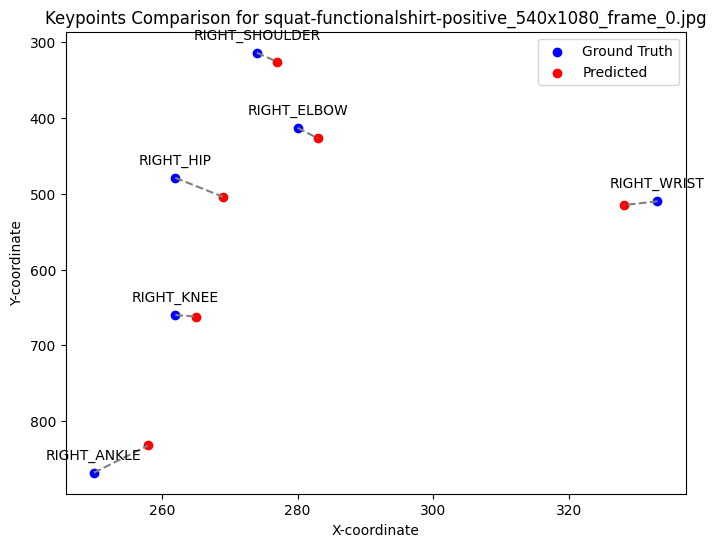

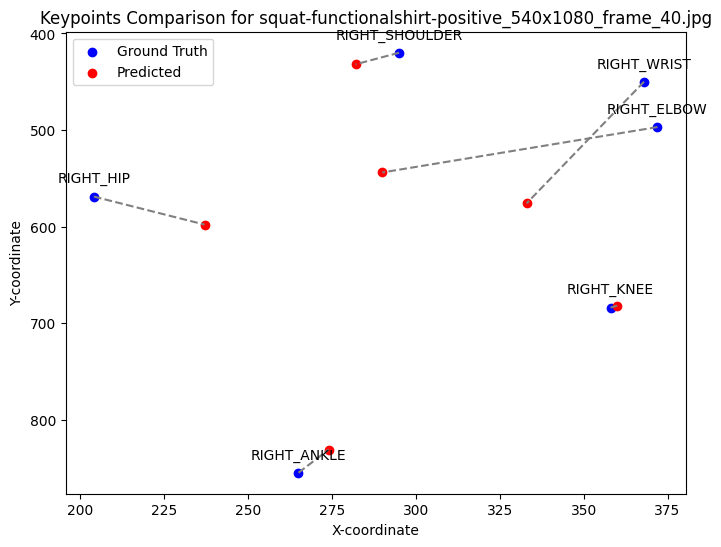

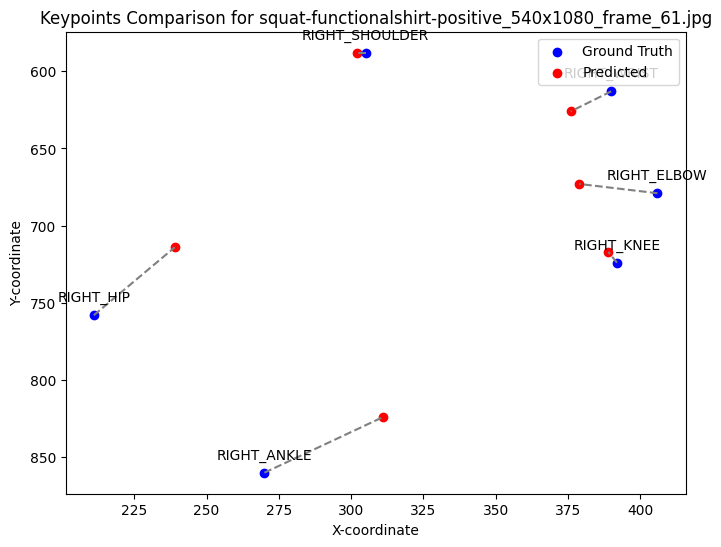

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


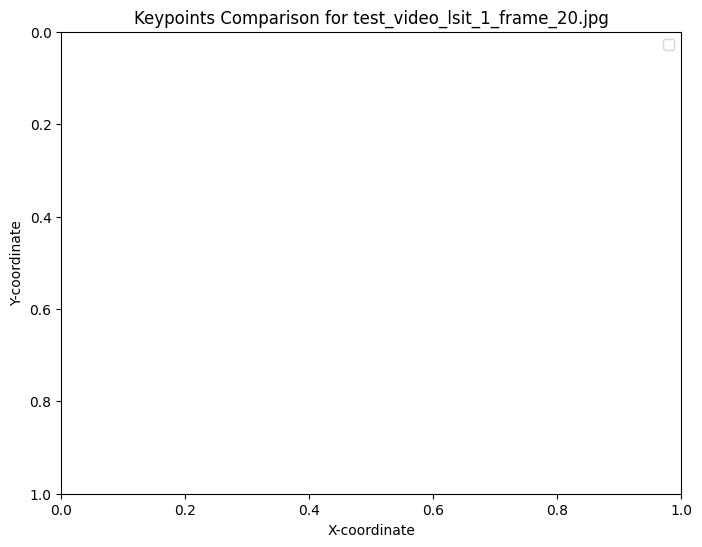

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


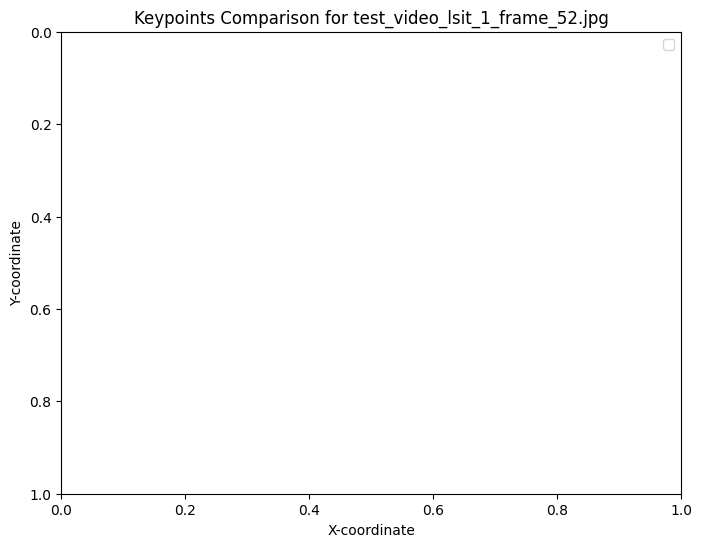

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


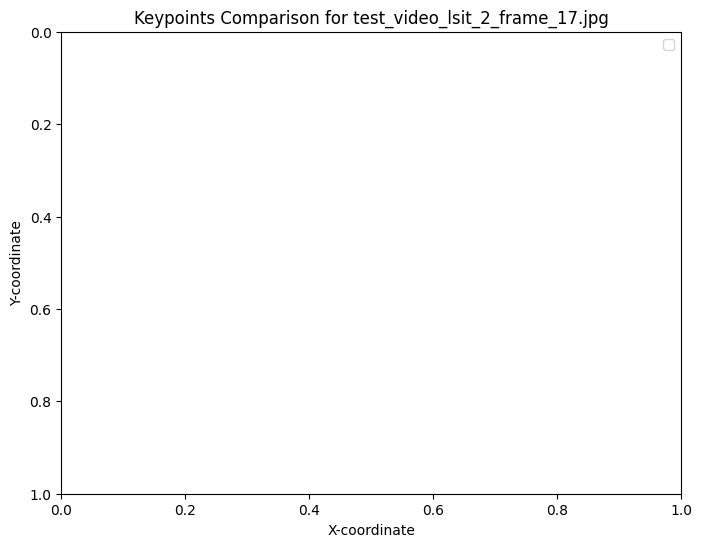

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


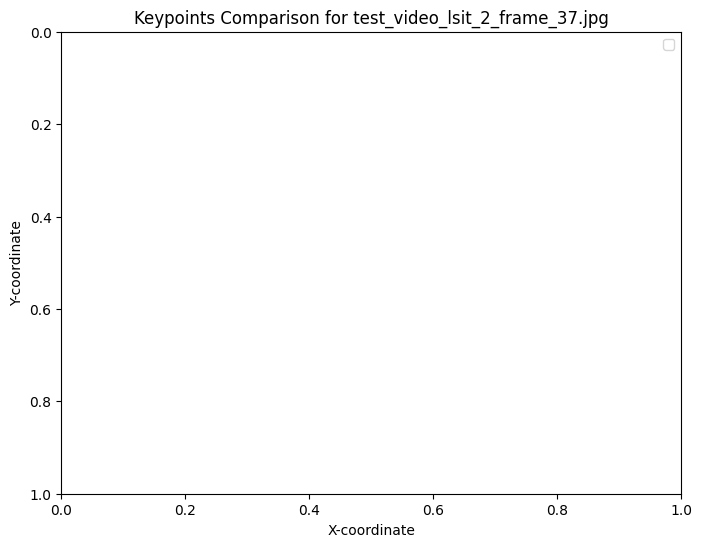

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


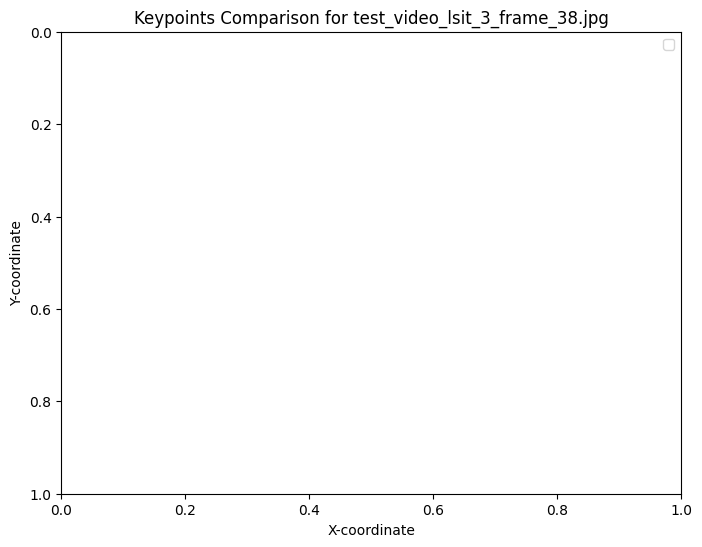

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


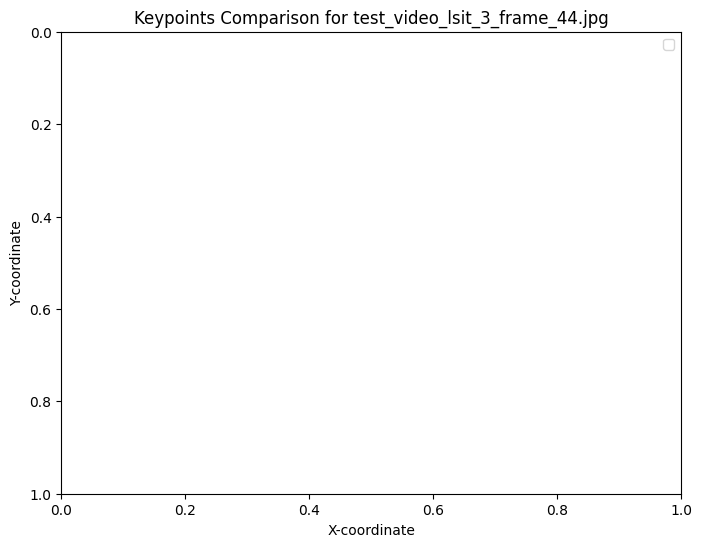

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


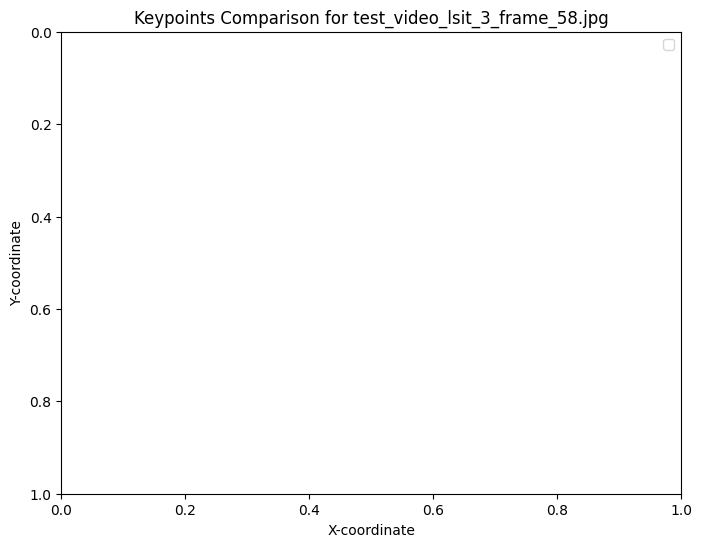

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


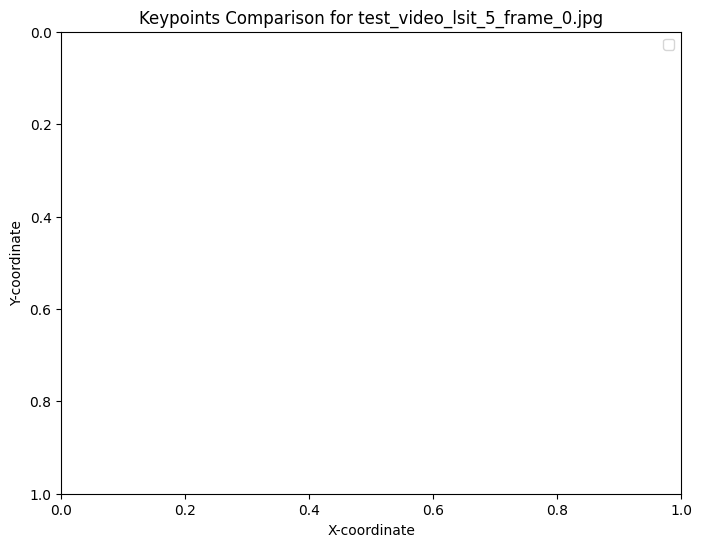

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


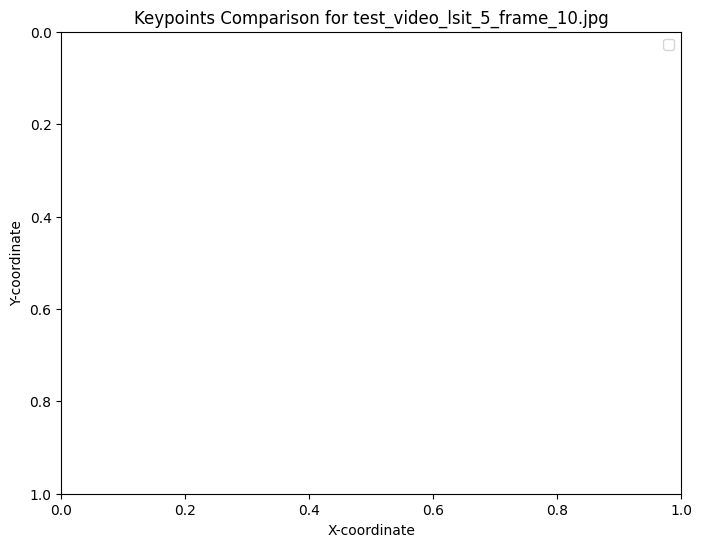

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


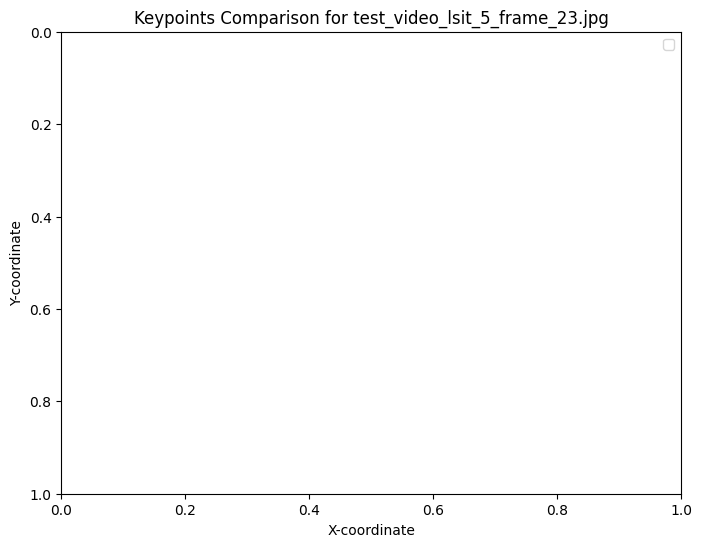

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


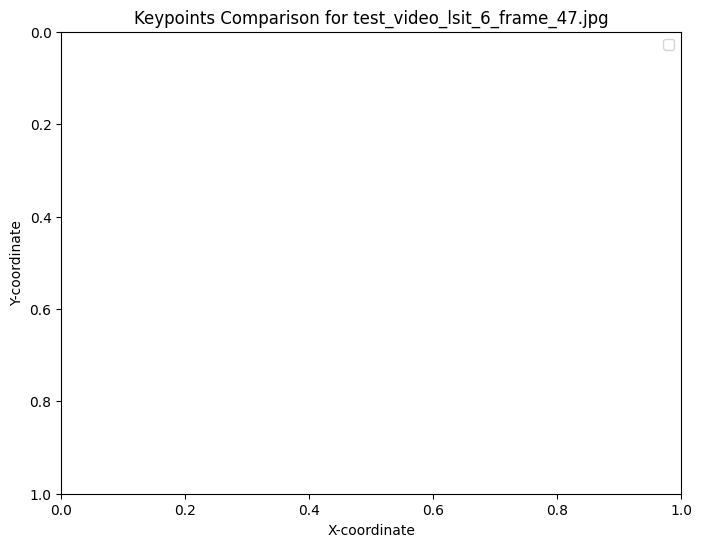

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


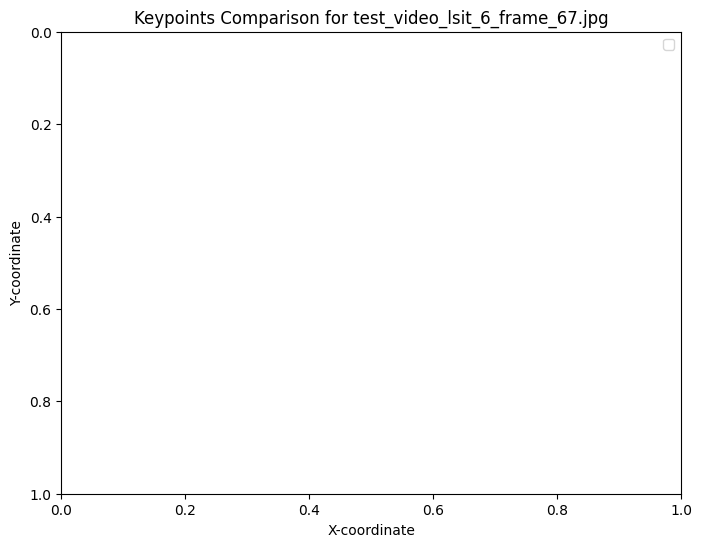

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


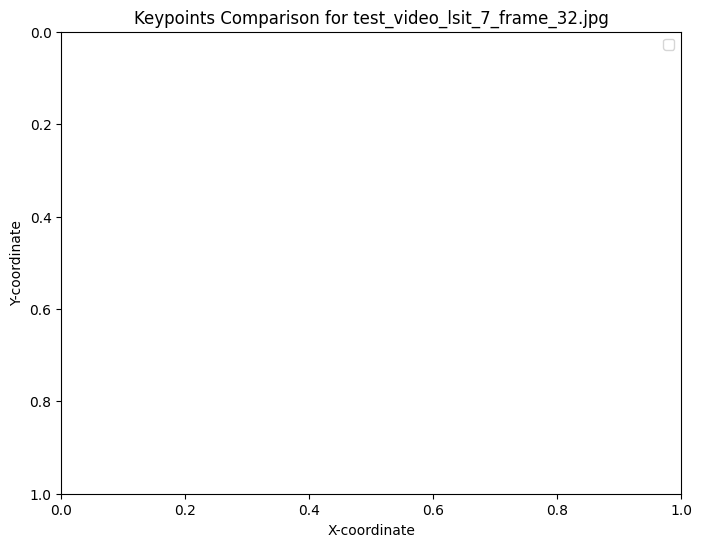

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


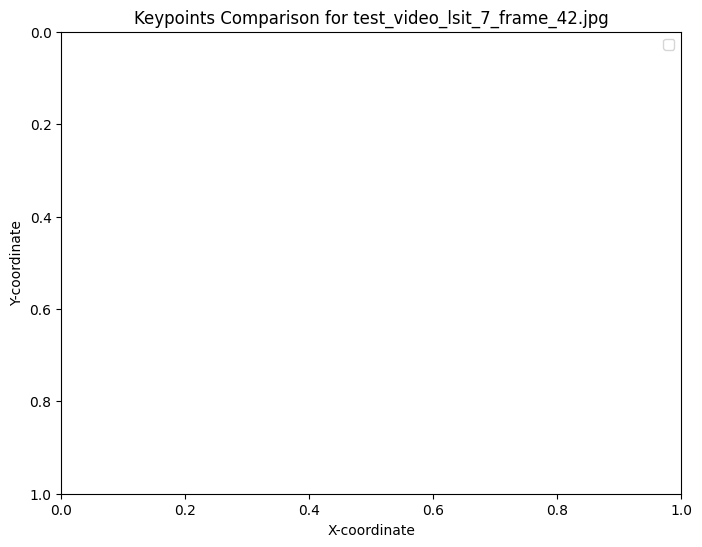

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


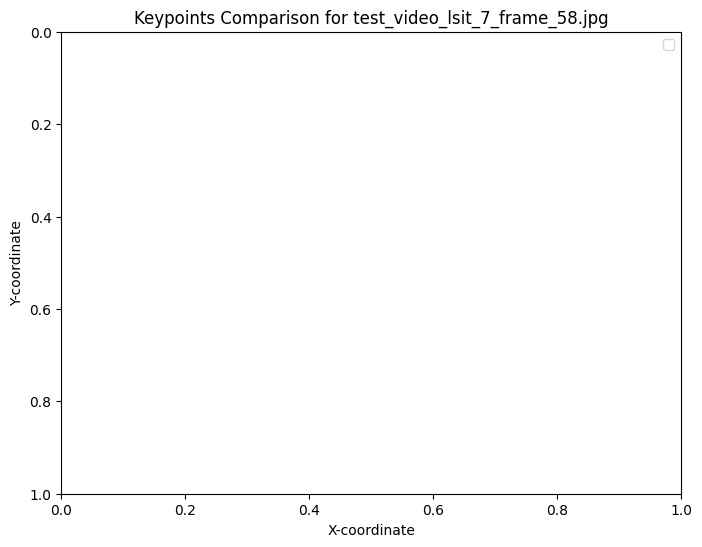

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


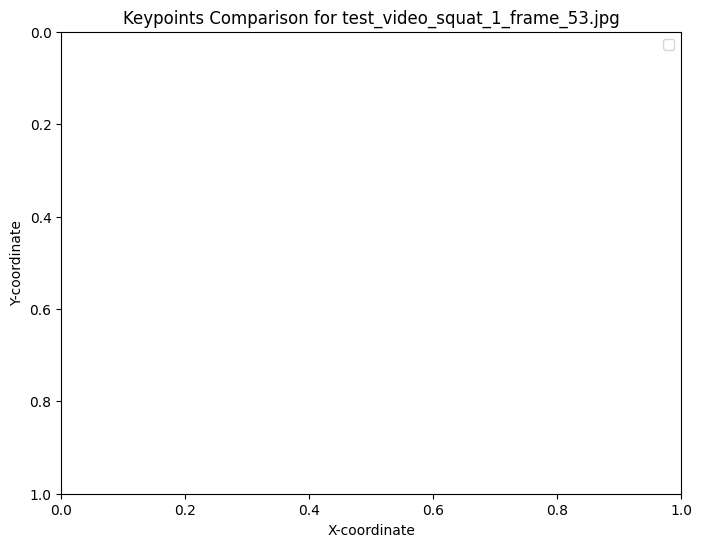

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


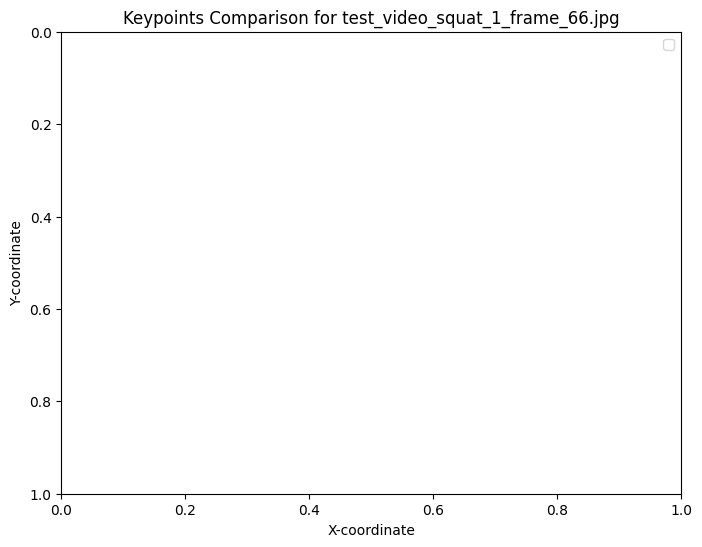

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


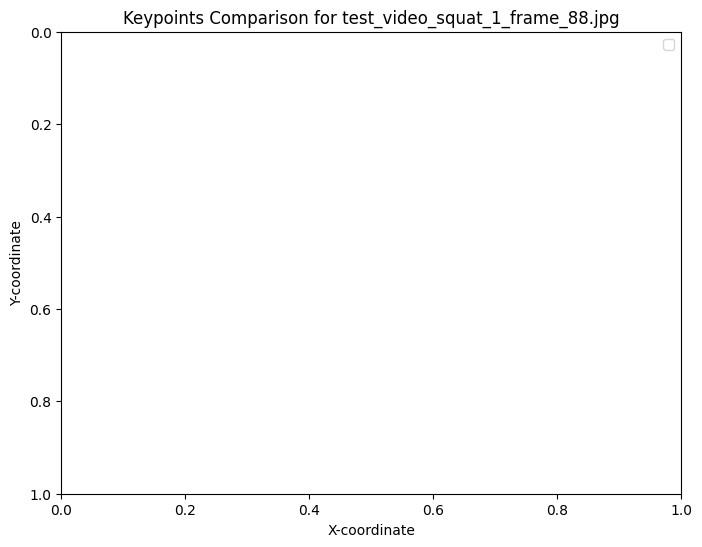

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


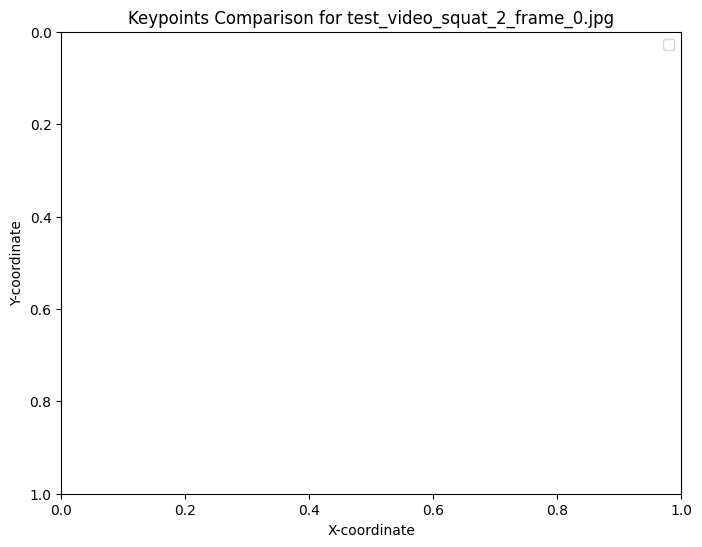

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


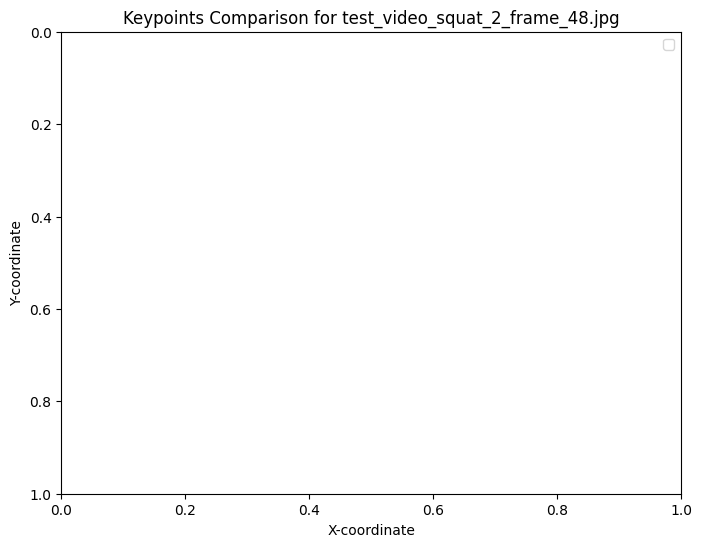

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


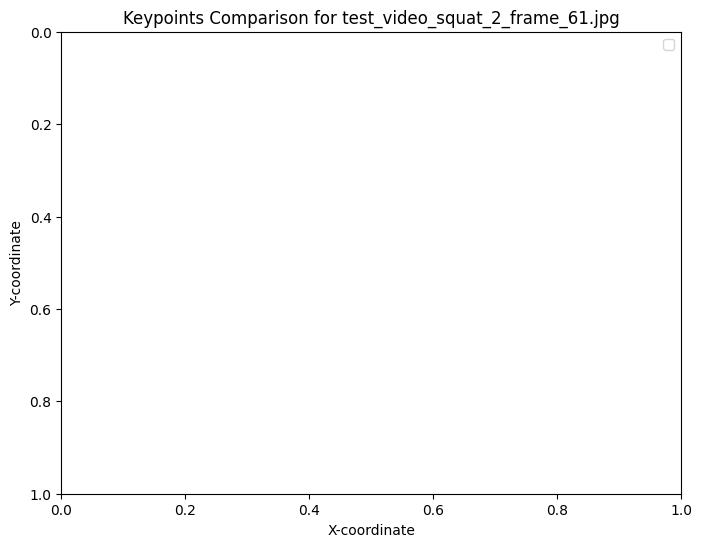

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


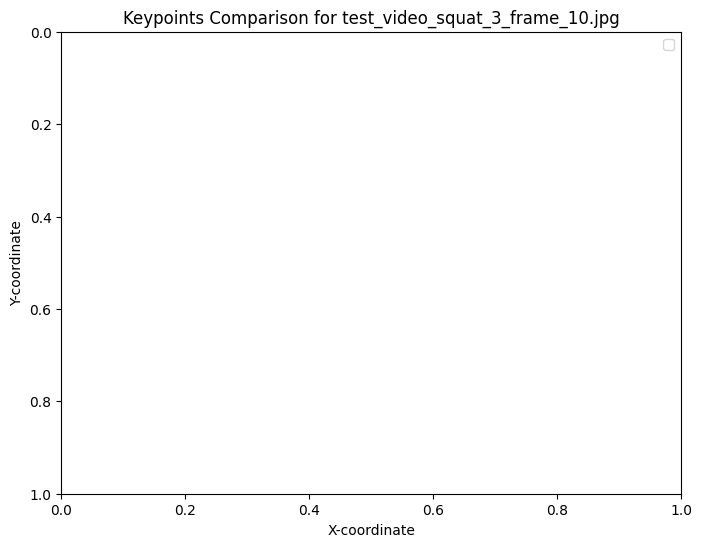

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


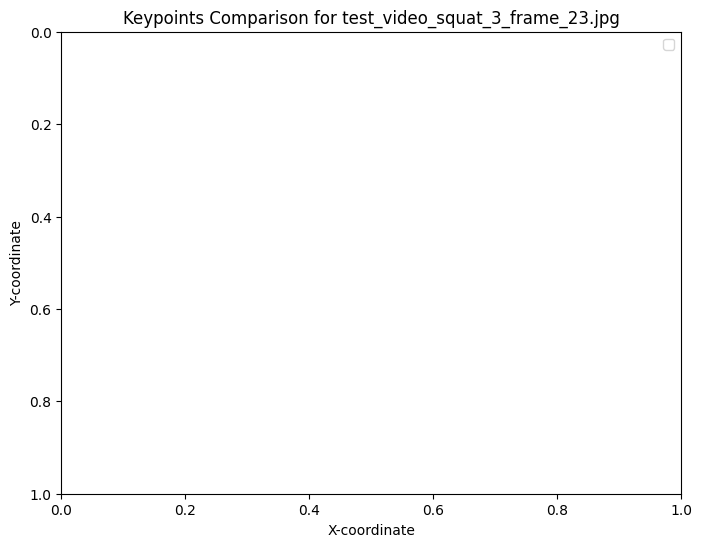

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


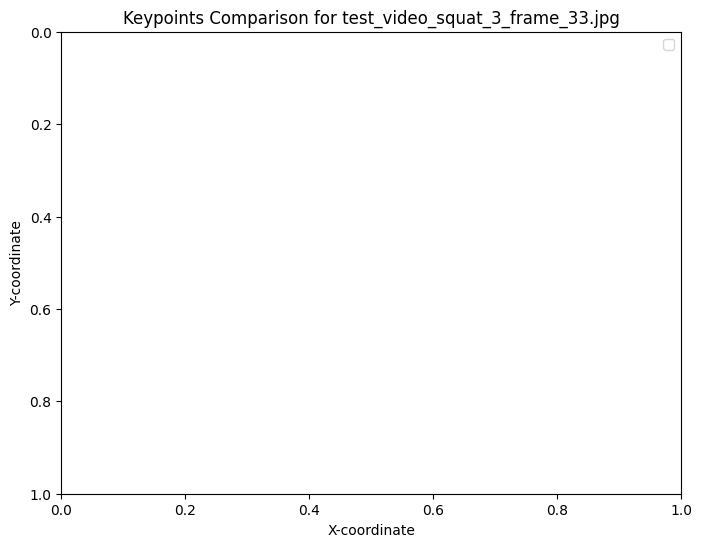

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


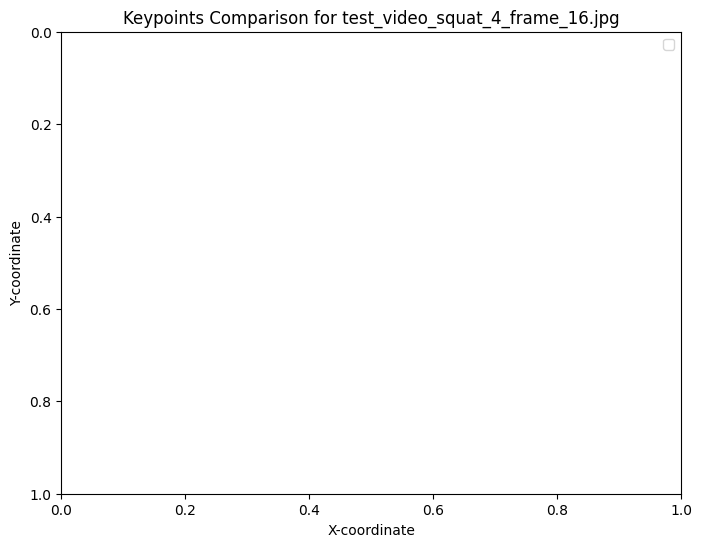

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


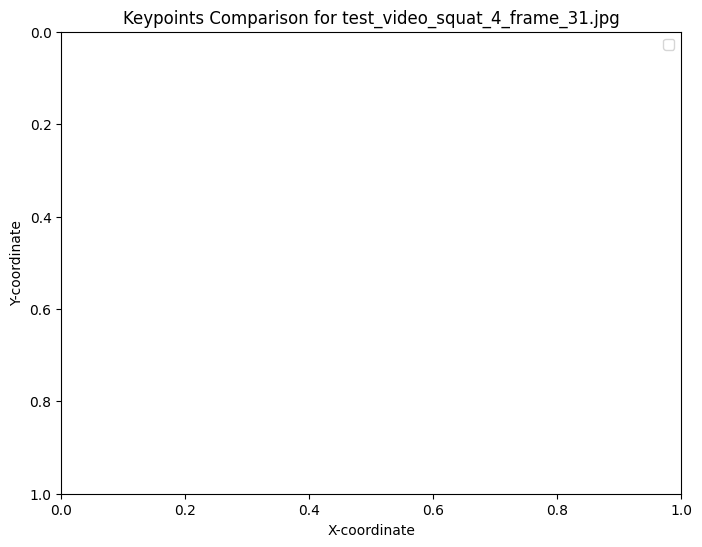

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


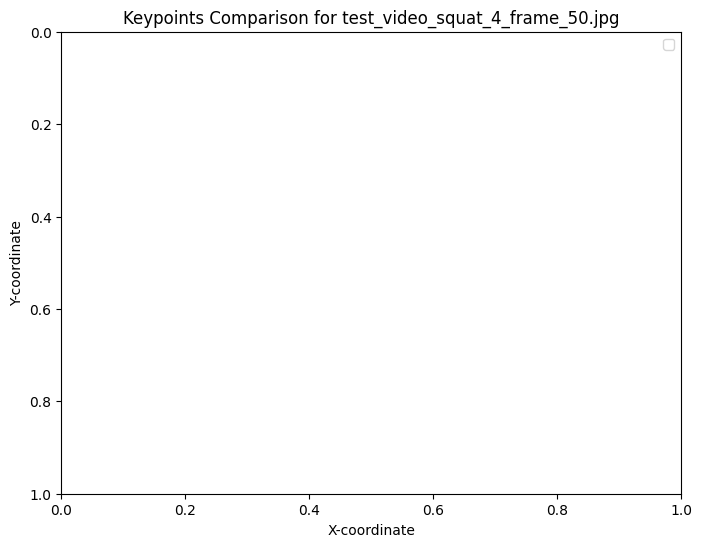

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


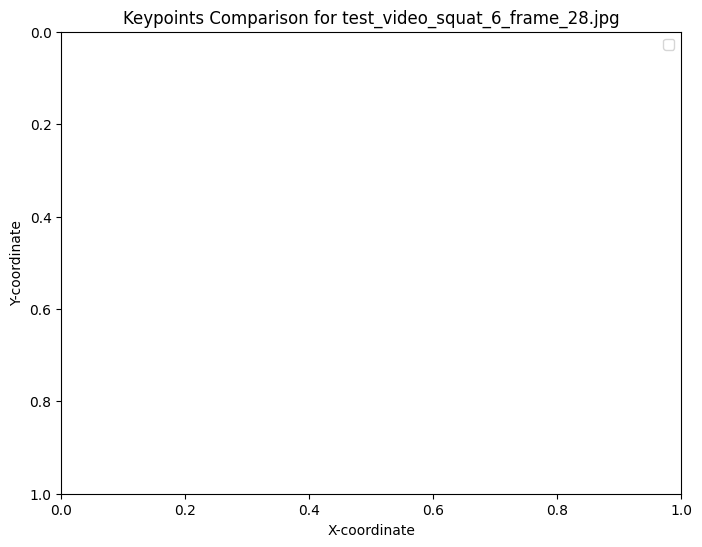

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


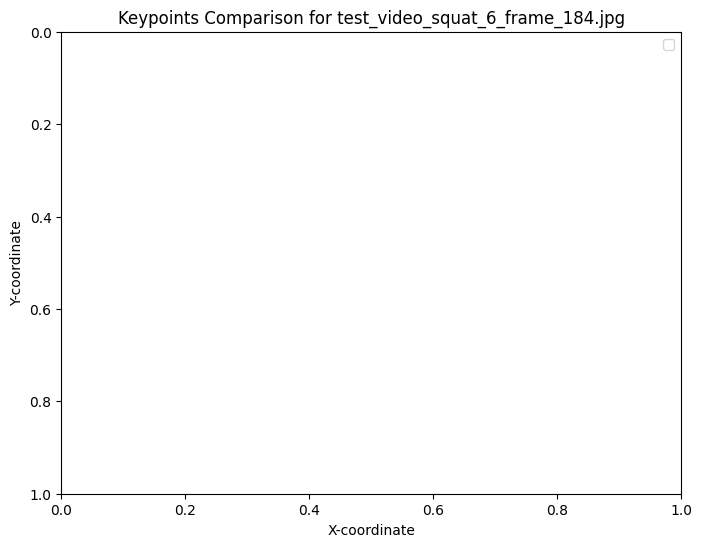

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


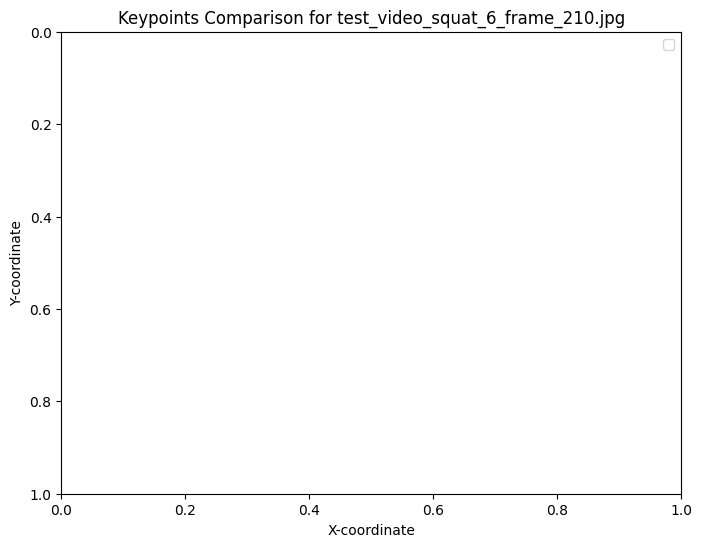

In [67]:
import matplotlib.pyplot as plt

# Plot scatter plots for each image
for label_data in keypoints_labels:
    filename = label_data["filename"]
    label_keypoints = label_data["keypoints"]
    
    hpe_data = next((item for item in keypoints_hpe if item["filename"] == filename), None)
    if not hpe_data:
        continue
    hpe_keypoints = hpe_data["keypoints"]
    hpe_keypoints_dict = {kp["label"]: kp for kp in hpe_keypoints}

    plt.figure(figsize=(8, 6))
    for label_kp in label_keypoints:
        label = label_kp["label"]
        plt.scatter(label_kp["x"], label_kp["y"], color='blue', label='Ground Truth' if label == label_keypoints[0]["label"] else "")
        if label in hpe_keypoints_dict:
            hpe_kp = hpe_keypoints_dict[label]
            plt.scatter(hpe_kp["x"], hpe_kp["y"], color='red', label='Predicted' if label == label_keypoints[0]["label"] else "")
            plt.plot([label_kp["x"], hpe_kp["x"]], [label_kp["y"], hpe_kp["y"]], color='gray', linestyle='dashed')
            plt.annotate(label, (label_kp["x"], label_kp["y"]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.title(f"Keypoints Comparison for {filename}")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

## Plot the differences for each keypoint label

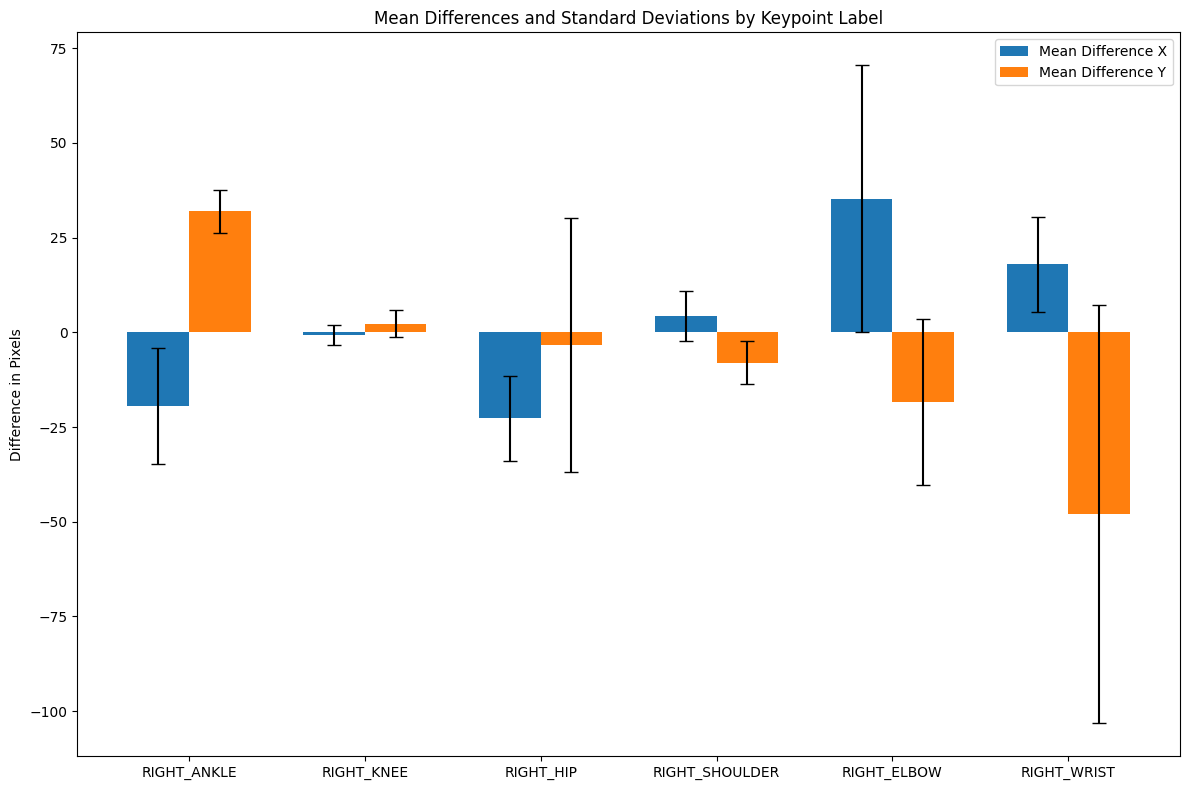

In [70]:
# Compute statistics (mean and standard deviation) for each keypoint label
statistics = {}
differences = defaultdict(list)

for label_data in keypoints_labels:
    filename = label_data["filename"]
    label_keypoints = label_data["keypoints"]
    
    hpe_data = next((item for item in keypoints_hpe if item["filename"] == filename), None)
    if not hpe_data:
        continue
    
    hpe_keypoints = hpe_data["keypoints"]
    hpe_keypoints_dict = {kp["label"]: kp for kp in hpe_keypoints}
    
    for label_kp in label_keypoints:
        label = label_kp["label"]
        if label in hpe_keypoints_dict:
            hpe_kp = hpe_keypoints_dict[label]
            diff_x = label_kp["x"] - hpe_kp["x"]
            diff_y = label_kp["y"] - hpe_kp["y"]
            differences[label].append((diff_x, diff_y))

for label, diffs in differences.items():
    diffs_array = np.array(diffs)
    mean_diff = np.mean(diffs_array, axis=0)
    std_diff = np.std(diffs_array, axis=0)
    statistics[label] = {
        "mean_diff": mean_diff,
        "std_diff": std_diff
    }

# Bar chart for mean differences and standard deviations
labels = list(statistics.keys())
mean_diffs_x = [statistics[label]["mean_diff"][0] for label in labels]
mean_diffs_y = [statistics[label]["mean_diff"][1] for label in labels]
std_diffs_x = [statistics[label]["std_diff"][0] for label in labels]
std_diffs_y = [statistics[label]["std_diff"][1] for label in labels]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(12, 8))

# Bar plots for X-coordinate differences
rects1 = ax.bar(x - width/2, mean_diffs_x, width, label='Mean Difference X', yerr=std_diffs_x, capsize=5)
rects2 = ax.bar(x + width/2, mean_diffs_y, width, label='Mean Difference Y', yerr=std_diffs_y, capsize=5)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Difference in Pixels')
ax.set_title('Mean Differences and Standard Deviations by Keypoint Label')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

## Plot the combined statistics for all keypoints

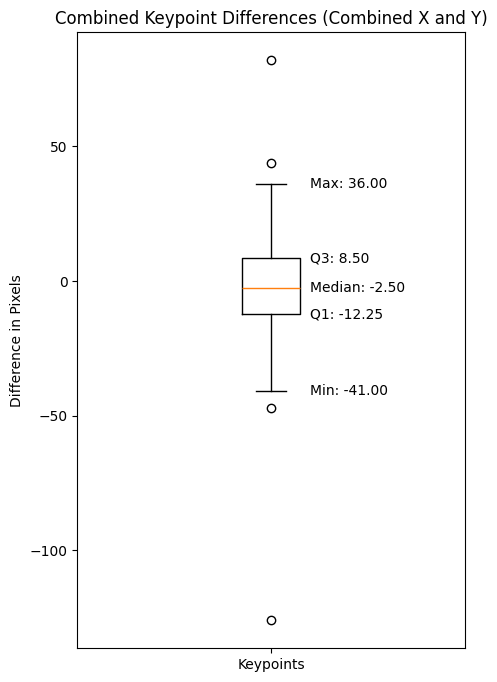

In [82]:
# Compute differences for each keypoint
differences = []
for label_data in keypoints_labels:
    filename = label_data["filename"]
    label_keypoints = label_data["keypoints"]
    
    hpe_data = next((item for item in keypoints_hpe if item["filename"] == filename), None)
    if not hpe_data:
        continue
    
    hpe_keypoints = hpe_data["keypoints"]
    hpe_keypoints_dict = {kp["label"]: kp for kp in hpe_keypoints}
    
    for label_kp in label_keypoints:
        label = label_kp["label"]
        if label in hpe_keypoints_dict:
            hpe_kp = hpe_keypoints_dict[label]
            diff_x = label_kp["x"] - hpe_kp["x"]
            diff_y = label_kp["y"] - hpe_kp["y"]
            differences.append(diff_x)
            differences.append(diff_y)

# Convert differences to numpy array for plotting
differences = np.array(differences)

# Plot boxplot for combined keypoint differences
plt.figure(figsize=(5, 8))
boxplot = plt.boxplot(differences, vert=True, patch_artist=False)
plt.title('Combined Keypoint Differences (Combined X and Y)')
plt.ylabel('Difference in Pixels')
plt.xticks([1], ['Keypoints'])

# Extract boxplot statistics
med = boxplot['medians'][0].get_ydata()[0]
q1 = boxplot['boxes'][0].get_ydata()[1]
q3 = boxplot['boxes'][0].get_ydata()[3]
min_val = boxplot['whiskers'][0].get_ydata()[1]
max_val = boxplot['whiskers'][1].get_ydata()[1]

# Add text annotations
plt.text(1.1, med, f'Median: {med:.2f}', verticalalignment='center')
plt.text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='center')
plt.text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='center')
plt.text(1.1, min_val, f'Min: {min_val:.2f}', verticalalignment='center')
plt.text(1.1, max_val, f'Max: {max_val:.2f}', verticalalignment='center')

plt.show()